In [283]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

##### Reading and Understanding the Data

In [284]:
data = pd.DataFrame(pd.read_csv('melb_data.csv'))

In [285]:
data.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [286]:
data.shape

(13580, 21)

In [287]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  float64
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

In [288]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Rooms,13580.0,2.937997e+00,0.955748,1.00000,2.000000,3.000000,3.000000e+00,1.000000e+01
Price,13580.0,1.075684e+06,639310.724296,85000.00000,650000.000000,903000.000000,1.330000e+06,9.000000e+06
Distance,13580.0,1.013778e+01,5.868725,0.00000,6.100000,9.200000,1.300000e+01,4.810000e+01
Postcode,13580.0,3.105302e+03,90.676964,3000.00000,3044.000000,3084.000000,3.148000e+03,3.977000e+03
Bedroom2,13580.0,2.914728e+00,0.965921,0.00000,2.000000,3.000000,3.000000e+00,2.000000e+01
Bathroom,13580.0,1.534242e+00,0.691712,0.00000,1.000000,1.000000,2.000000e+00,8.000000e+00
Car,13518.0,1.610075e+00,0.962634,0.00000,1.000000,2.000000,2.000000e+00,1.000000e+01
Landsize,13580.0,5.584161e+02,3990.669241,0.00000,177.000000,440.000000,6.510000e+02,4.330140e+05
BuildingArea,7130.0,1.519676e+02,541.014538,0.00000,93.000000,126.000000,1.740000e+02,4.451500e+04
YearBuilt,8205.0,1.964684e+03,37.273762,1196.00000,1940.000000,1970.000000,1.999000e+03,2.018000e+03


In [289]:
data.describe(include=np.object).T

,count,unique,top,freq
Suburb,13580,314,Reservoir,359
Address,13580,13378,36 Aberfeldie St,3
Type,13580,3,h,9449
Method,13580,5,S,9022
SellerG,13580,268,Nelson,1565
Date,13580,58,27/05/2017,473
CouncilArea,12211,33,Moreland,1163
Regionname,13580,8,Southern Metropolitan,4695


##### Data Cleaning

In [290]:
# checking missing values

data.isnull().sum()*100/data.shape[0]

Suburb            0.000000
Address           0.000000
Rooms             0.000000
Type              0.000000
Price             0.000000
Method            0.000000
SellerG           0.000000
Date              0.000000
Distance          0.000000
Postcode          0.000000
Bedroom2          0.000000
Bathroom          0.000000
Car               0.456554
Landsize          0.000000
BuildingArea     47.496318
YearBuilt        39.580265
CouncilArea      10.081001
Lattitude         0.000000
Longtitude        0.000000
Regionname        0.000000
Propertycount     0.000000
dtype: float64

In [291]:
data.loc[:,'Car'].head()

0    1.0
1    0.0
2    0.0
3    1.0
4    2.0
Name: Car, dtype: float64

##### Replace Missing Values with Zero in Cars Column and YearBuilt with value that comes directly after it

In [292]:
data['Car'].fillna(value=0, inplace=True)
data['YearBuilt'].fillna(method='bfill', axis=0, inplace=True)

##### Fill BuildingArea with the mean 

In [293]:
data['BuildingArea'].fillna(data['BuildingArea'].mean(), inplace=True)

##### Fill CouncilArea with the mode

In [294]:
data['CouncilArea'].fillna(data['CouncilArea'].mode()[0], inplace=True)

In [295]:
data.isnull().sum()*100/data.shape[0]

Suburb           0.0
Address          0.0
Rooms            0.0
Type             0.0
Price            0.0
Method           0.0
SellerG          0.0
Date             0.0
Distance         0.0
Postcode         0.0
Bedroom2         0.0
Bathroom         0.0
Car              0.0
Landsize         0.0
BuildingArea     0.0
YearBuilt        0.0
CouncilArea      0.0
Lattitude        0.0
Longtitude       0.0
Regionname       0.0
Propertycount    0.0
dtype: float64

##### Outlier Analysis

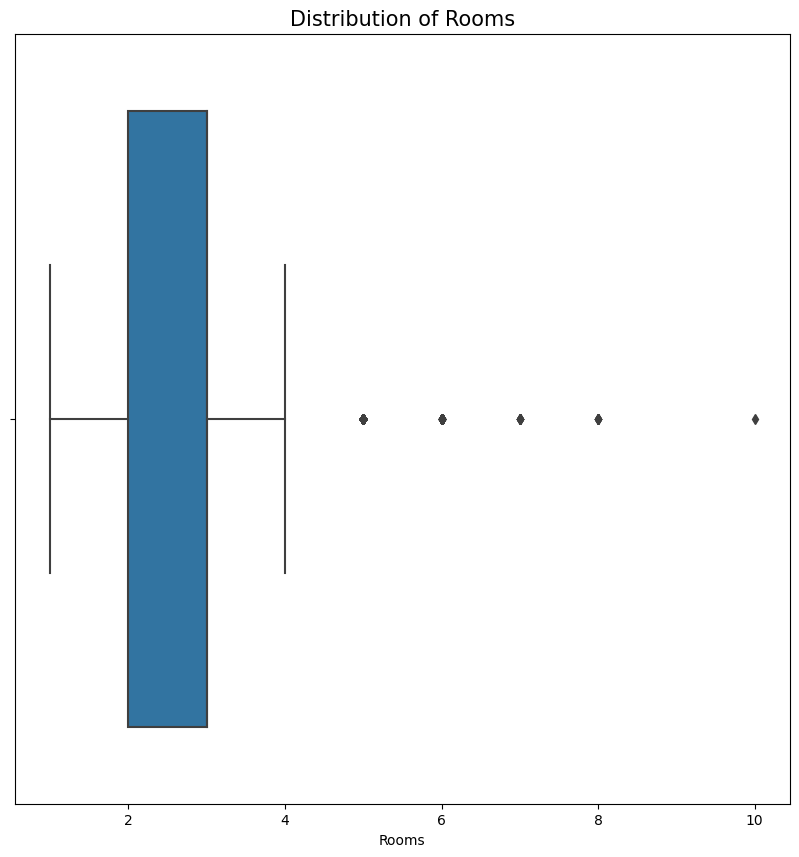

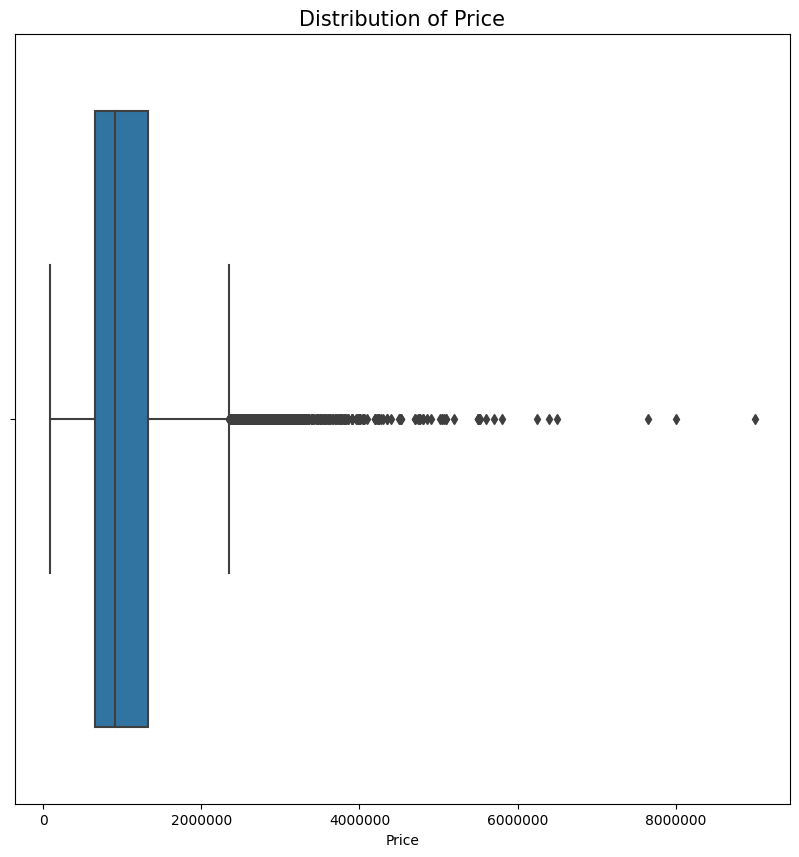

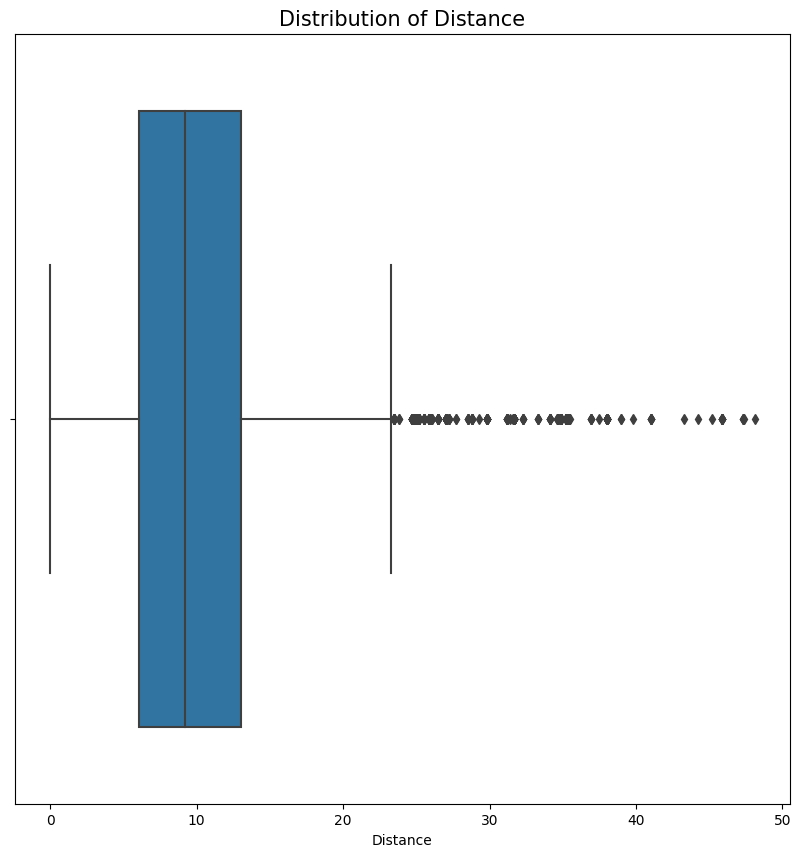

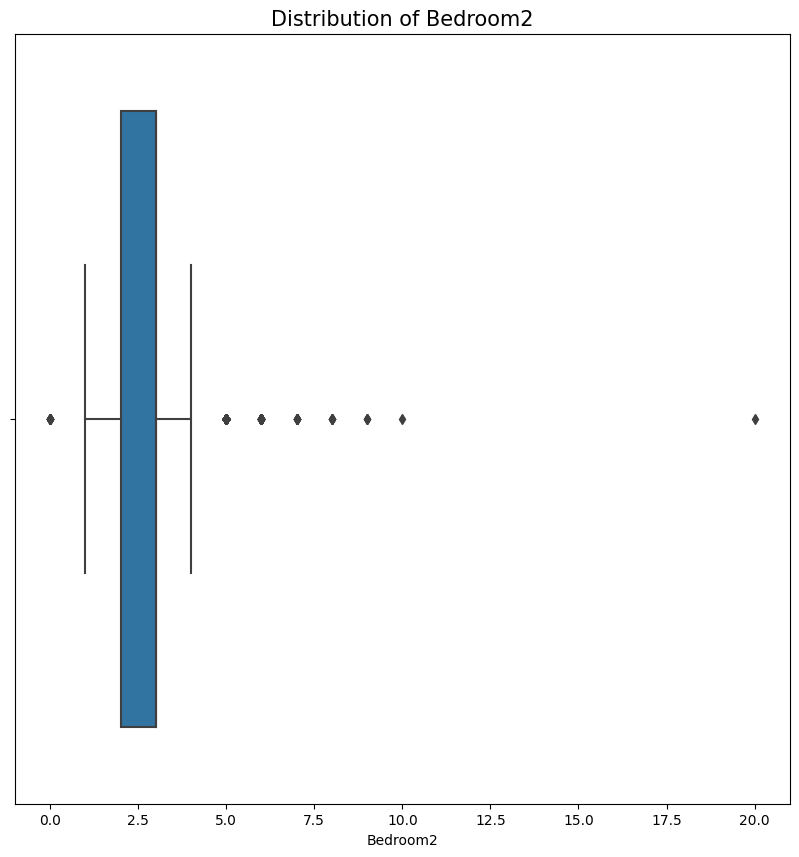

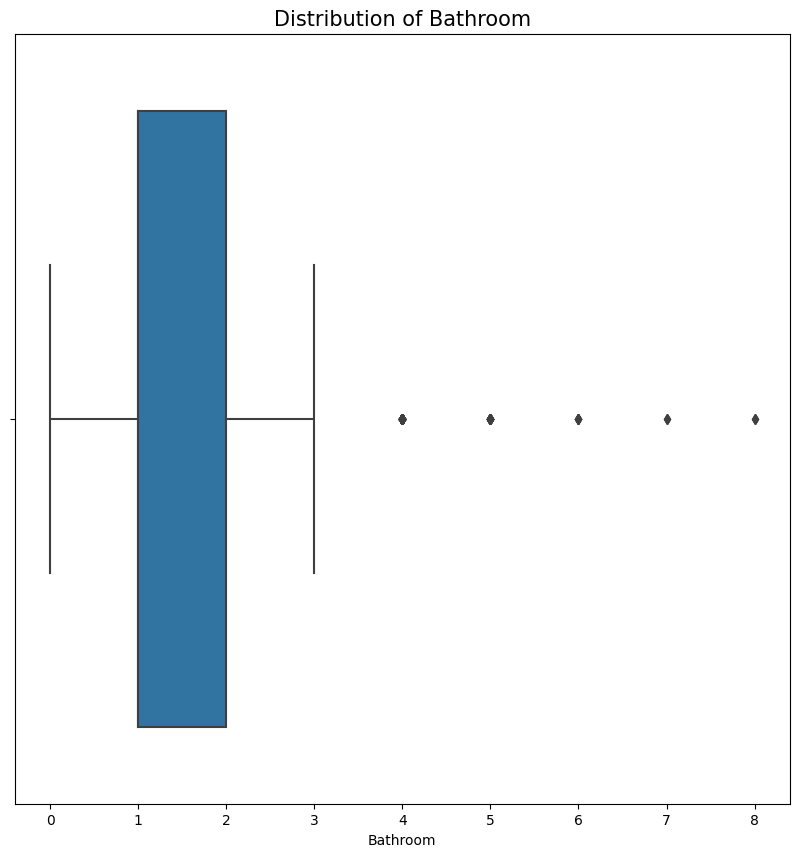

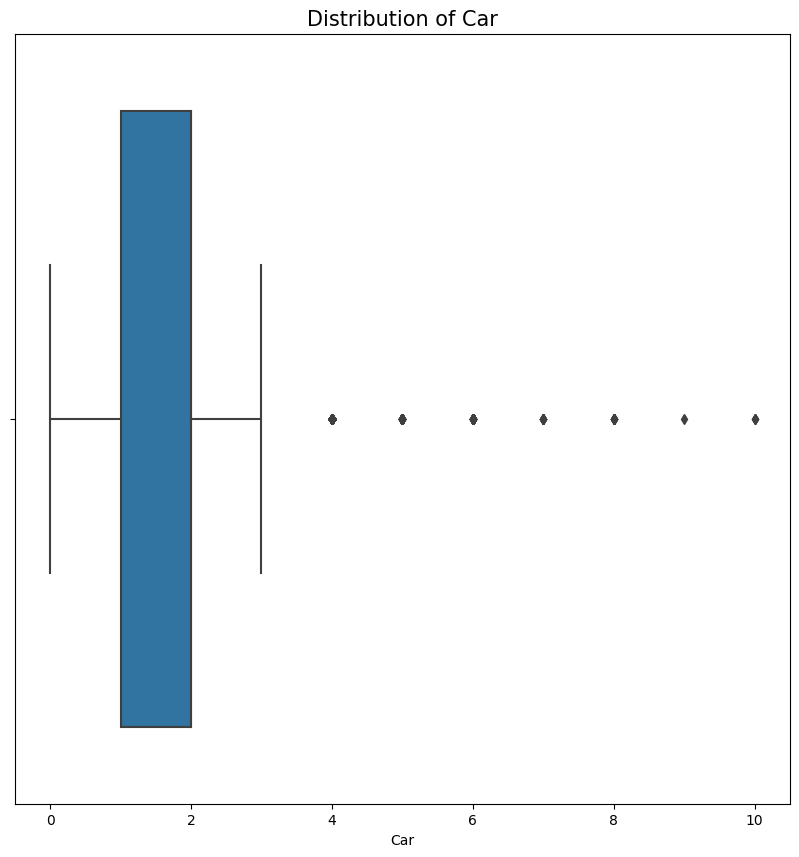

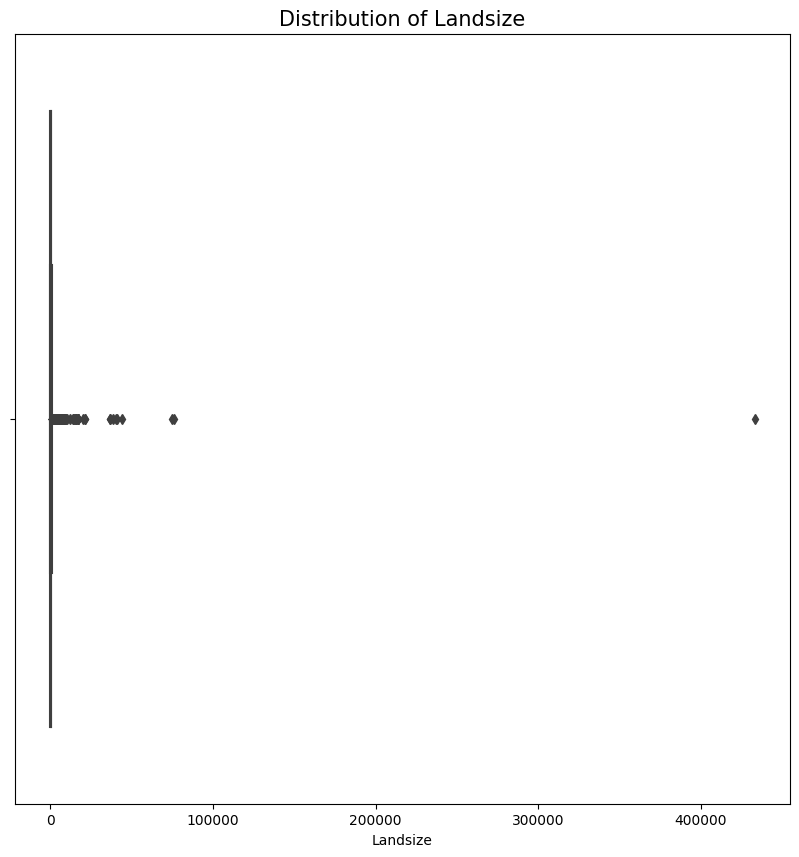

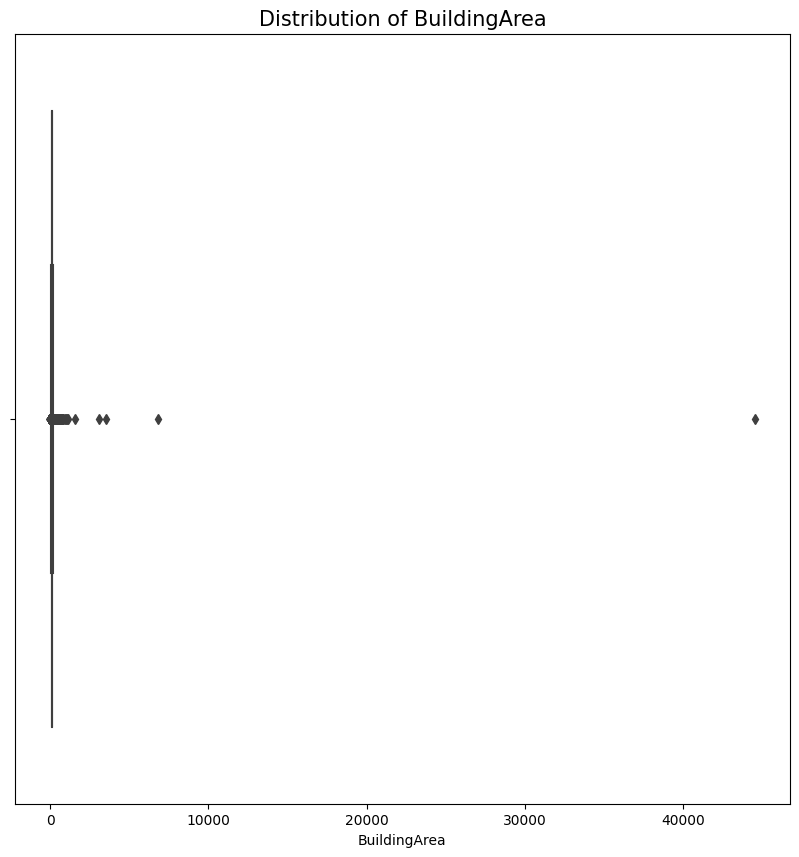

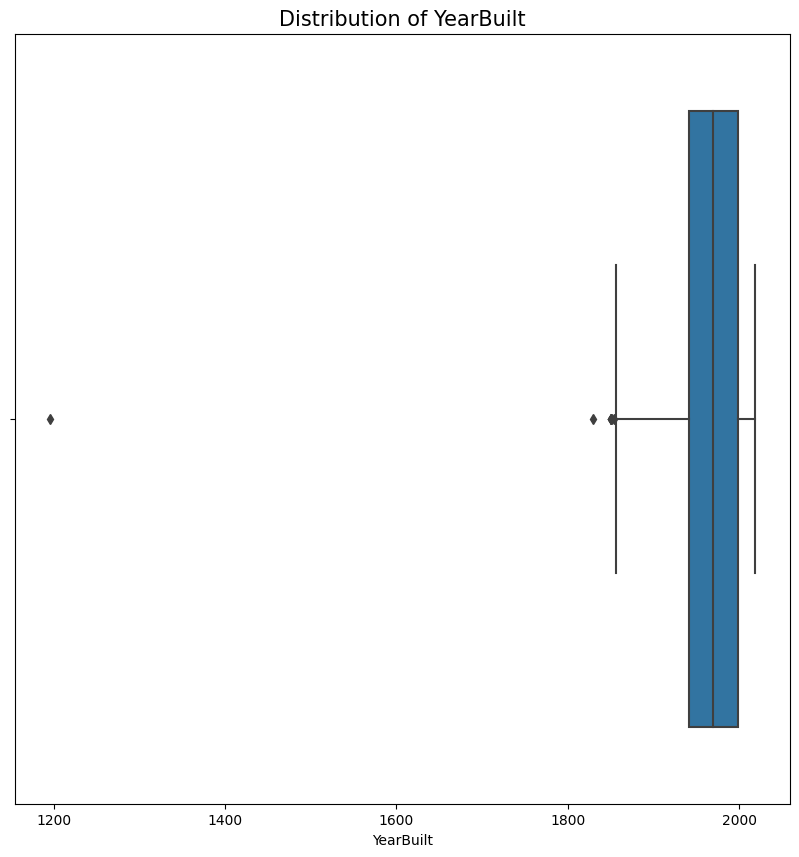

In [296]:
def BoxPlt(column_name):
    fig, ax = plt.subplots(figsize=(10,10))
    plt.ticklabel_format(style='plain')
    sns.boxplot(x=data[column_name], ax=ax)
    ax.set_title(f'Distribution of {column_name}', fontsize=15)

    plt.show()

columns_to_check_outliers = ['Rooms','Price','Distance','Bedroom2','Bathroom','Car','Landsize','BuildingArea','YearBuilt']

for col in columns_to_check_outliers:
    BoxPlt(col)

In [297]:
def remove_outliers(column_name):
    Q1=data[column_name].quantile(0.25)
    Q3=data[column_name].quantile(0.75)

    print(column_name)
    print('...........................')
    IQR=Q3-Q1
    print(Q1)
    print(Q3)
    print(IQR)

    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 + 1.5*IQR
    print(lower_bound, upper_bound)

    print('Removing outliers.............')
    data[column_name] = data[column_name].clip(upper=upper_bound, lower= lower_bound)
    print('Outliers removed................')

columns_to_remove_outliers = ['Rooms','Price','Distance','Bedroom2','Bathroom','Car','Landsize','BuildingArea','YearBuilt']

for col in columns_to_remove_outliers:
    remove_outliers(col)


Rooms
...........................
2.0
3.0
1.0
0.5 4.5
Removing outliers.............
Outliers removed................
Price
...........................
650000.0
1330000.0
680000.0
-370000.0 2350000.0
Removing outliers.............
Outliers removed................
Distance
...........................
6.1
13.0
6.9
-4.250000000000002 23.35
Removing outliers.............
Outliers removed................
Bedroom2
...........................
2.0
3.0
1.0
0.5 4.5
Removing outliers.............
Outliers removed................
Bathroom
...........................
1.0
2.0
1.0
-0.5 3.5
Removing outliers.............
Outliers removed................
Car
...........................
1.0
2.0
1.0
-0.5 3.5
Removing outliers.............
Outliers removed................
Landsize
...........................
177.0
651.0
474.0
-534.0 1362.0
Removing outliers.............
Outliers removed................
BuildingArea
...........................
122.0
151.96764988779805
29.967649887798046
77.04852516830293 1

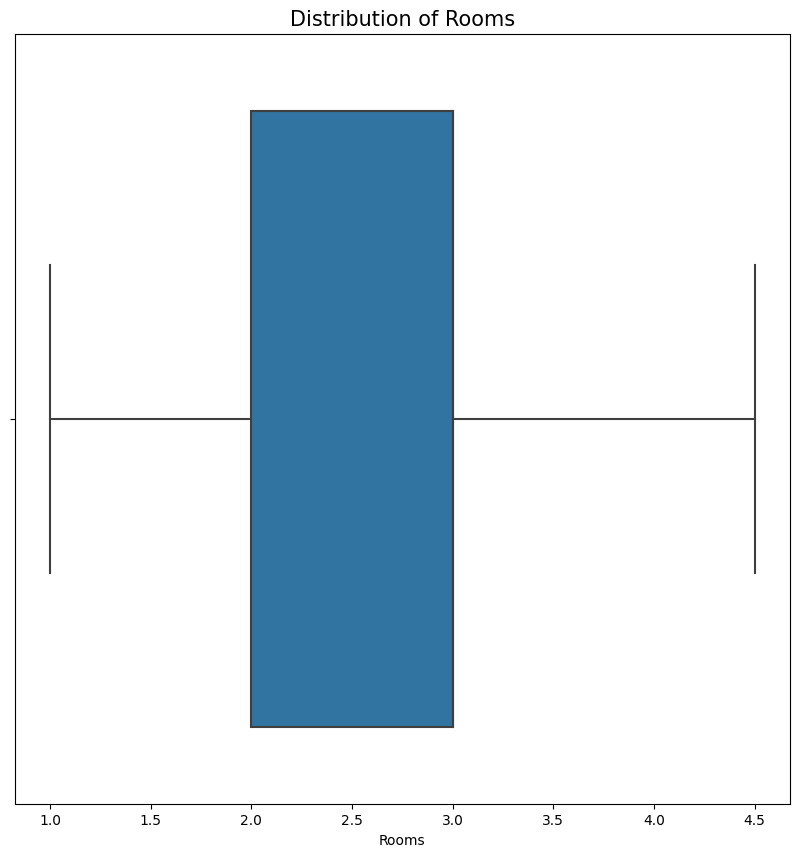

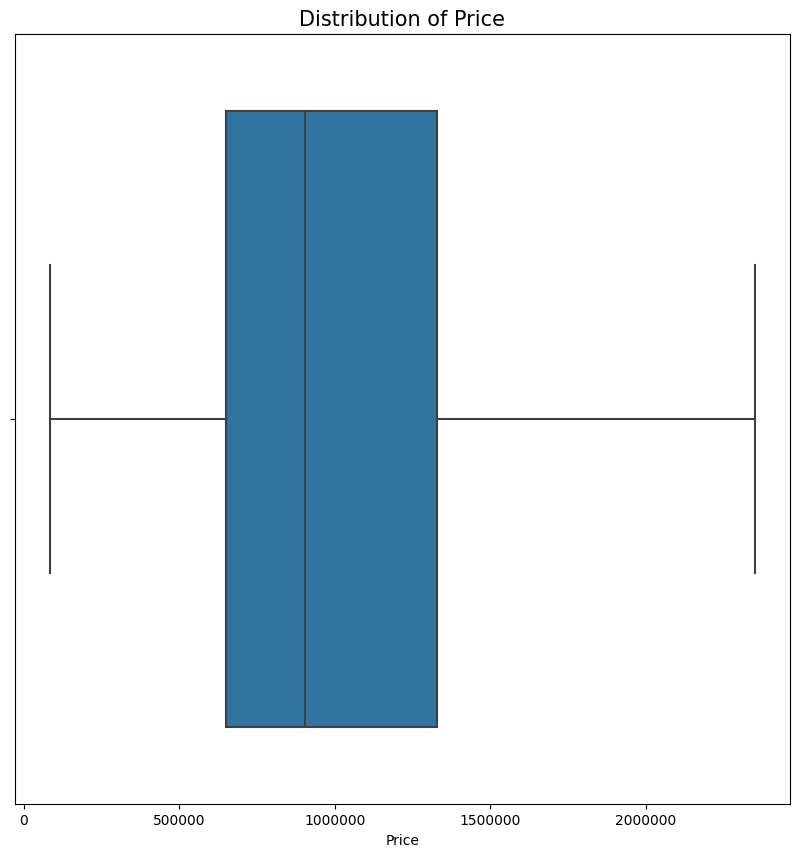

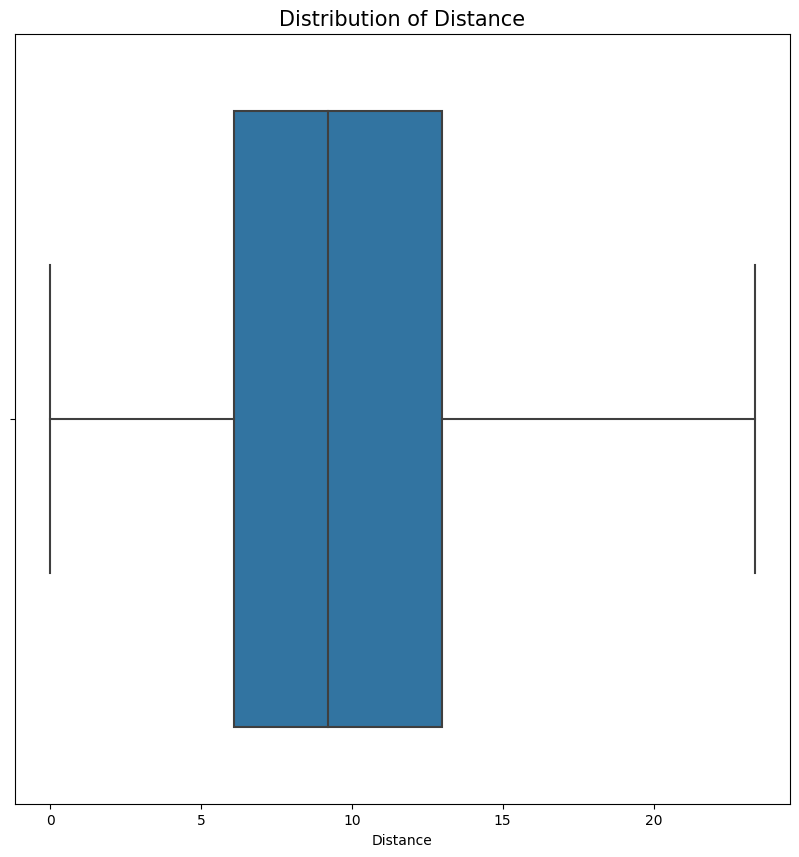

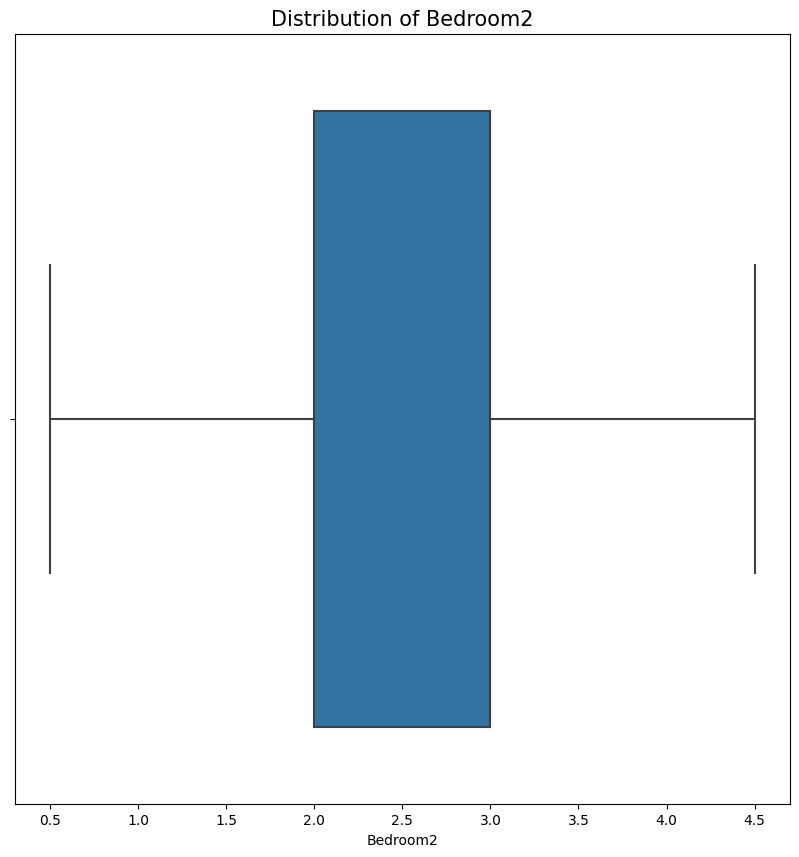

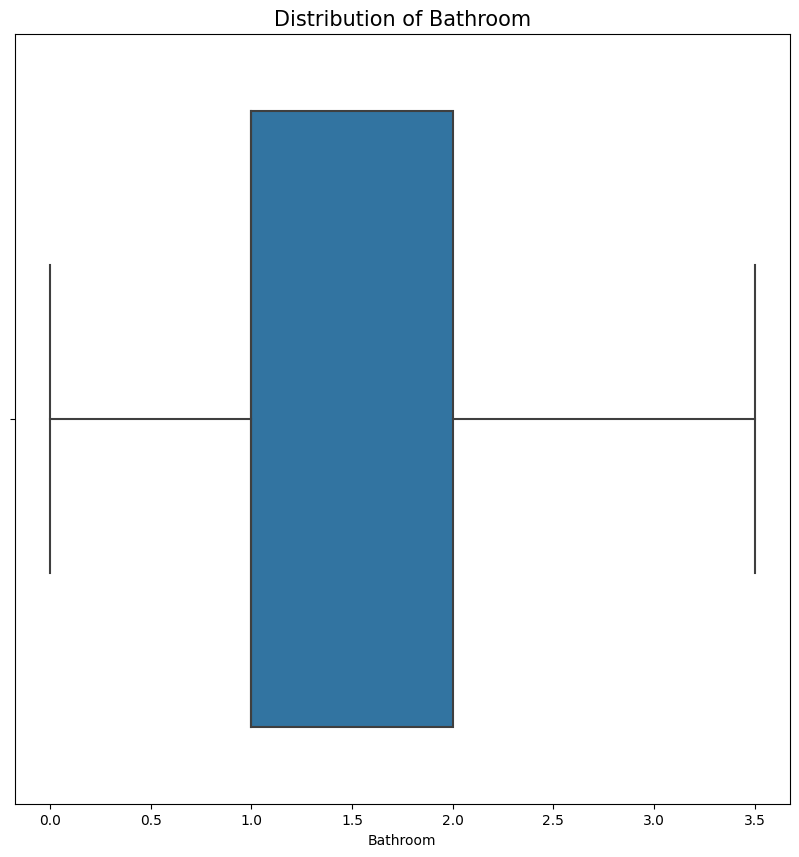

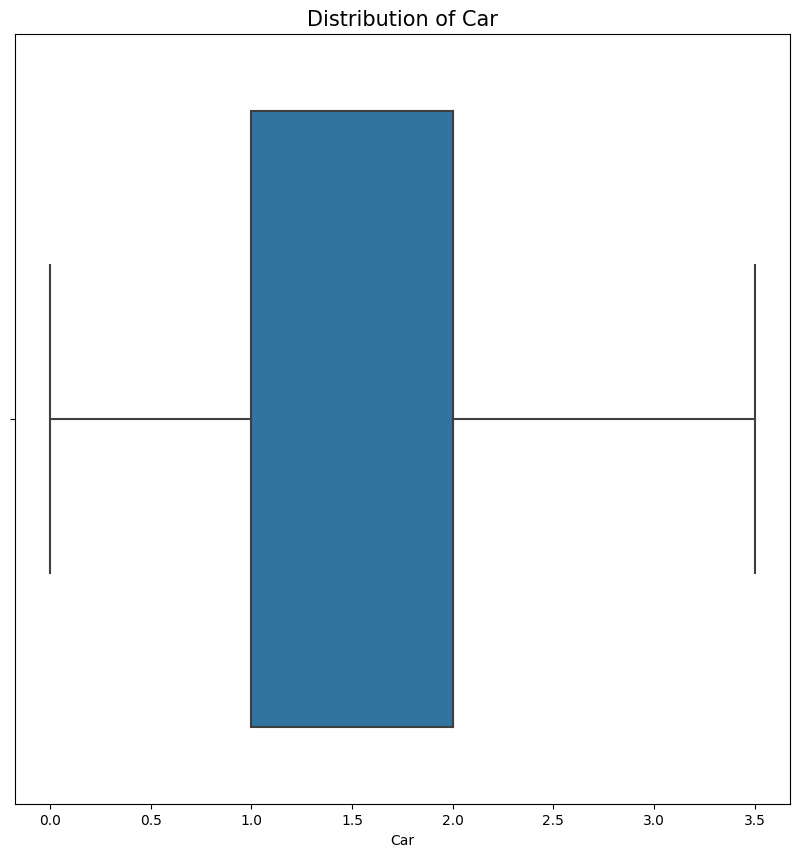

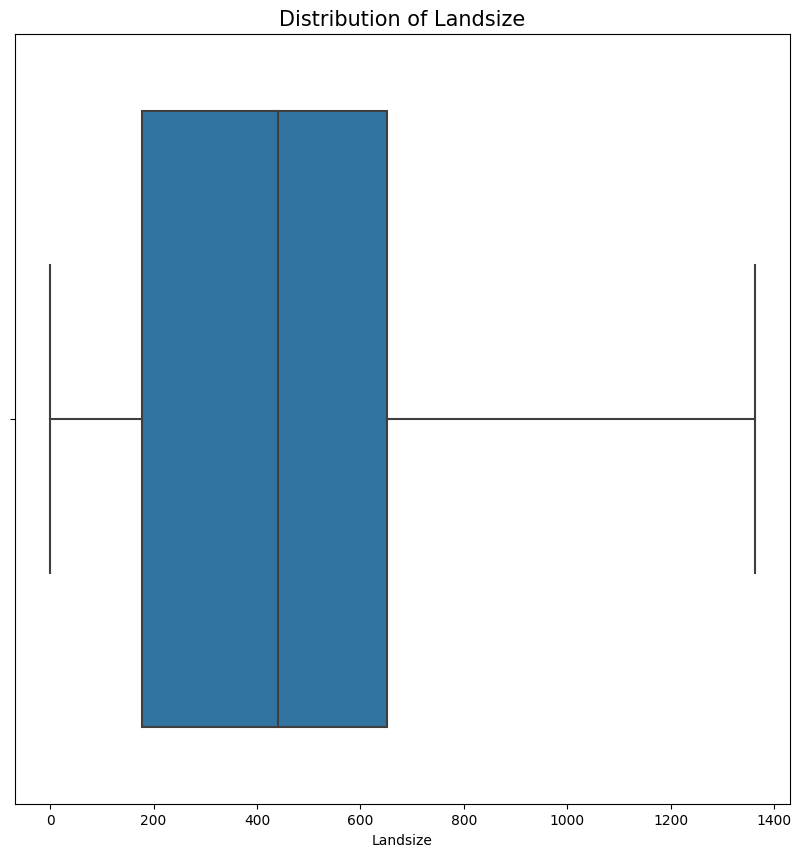

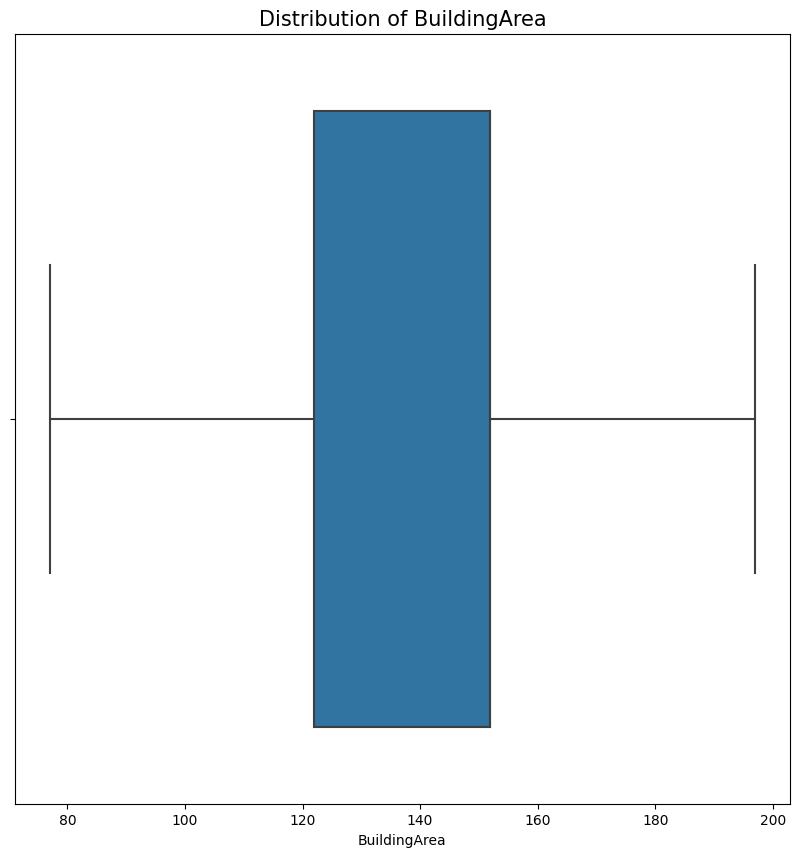

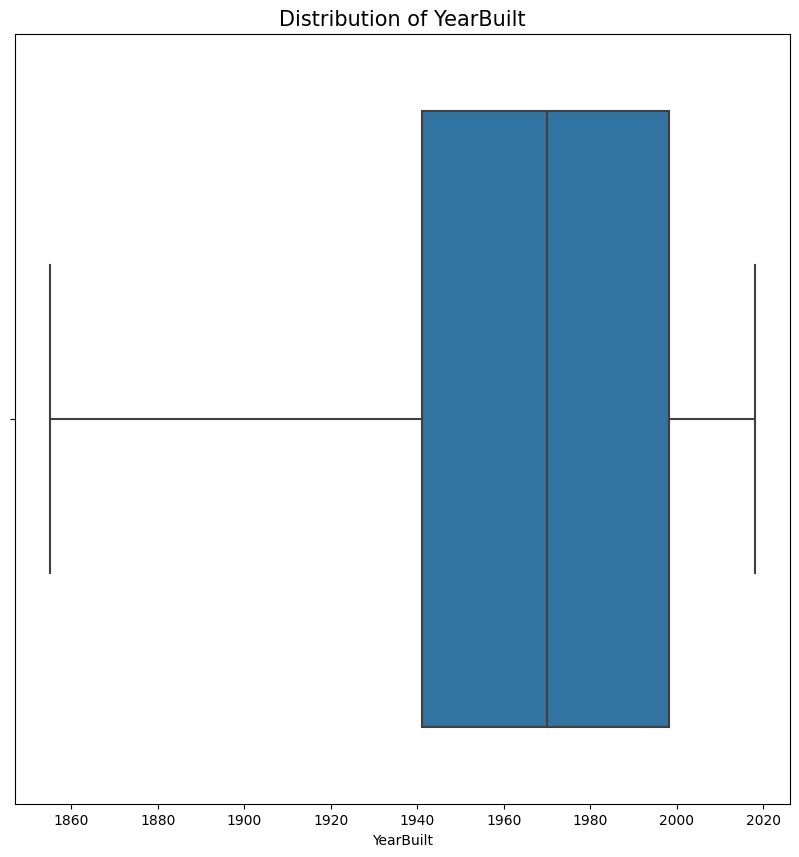

In [298]:
def BoxPlt(column_name):
    fig, ax = plt.subplots(figsize=(10,10))
    plt.ticklabel_format(style='plain')
    sns.boxplot(x=data[column_name], ax=ax)
    ax.set_title(f'Distribution of {column_name}', fontsize=15)

    plt.show()

columns_to_check_outliers = ['Rooms','Price','Distance','Bedroom2','Bathroom','Car','Landsize','BuildingArea','YearBuilt']

for col in columns_to_check_outliers:
    BoxPlt(col)

##### Visualising Categorical Variables

In [299]:
data.describe(include=np.object).T

,count,unique,top,freq
Suburb,13580,314,Reservoir,359
Address,13580,13378,36 Aberfeldie St,3
Type,13580,3,h,9449
Method,13580,5,S,9022
SellerG,13580,268,Nelson,1565
Date,13580,58,27/05/2017,473
CouncilArea,13580,33,Moreland,2532
Regionname,13580,8,Southern Metropolitan,4695


In [300]:
print("Types:", data['Type'].unique())
print("Methods:", data['Method'].unique())
print("Regions:", data['Regionname'].unique())

Types: ['h' 'u' 't']
Methods: ['S' 'SP' 'PI' 'VB' 'SA']
Regions: ['Northern Metropolitan' 'Western Metropolitan' 'Southern Metropolitan'
 'Eastern Metropolitan' 'South-Eastern Metropolitan' 'Eastern Victoria'
 'Northern Victoria' 'Western Victoria']


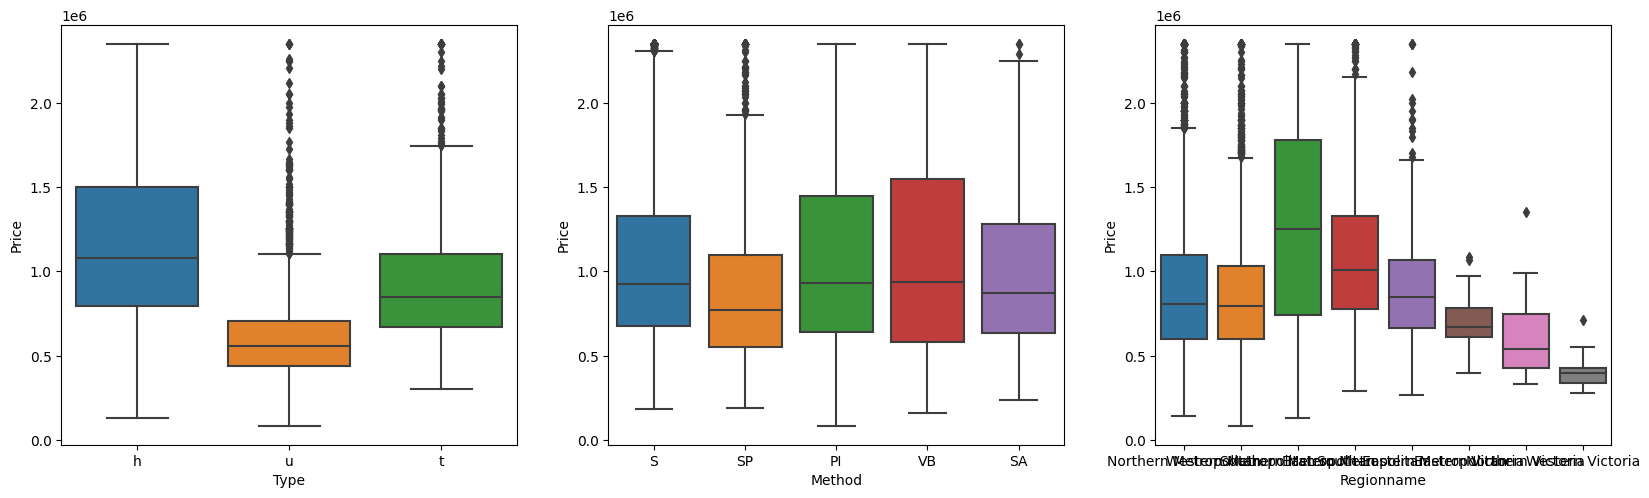

In [301]:
plt.figure(figsize=(20, 12))

plt.subplot(2,3,1)
sns.boxplot(x = 'Type', y = 'Price', data = data)

plt.subplot(2,3,2)
sns.boxplot(x = 'Method', y = 'Price', data = data)

plt.subplot(2,3,3)
sns.boxplot(x = 'Regionname', y = 'Price', data = data)


plt.show()

##### Data Preparation

##### Dummy Variables

In [302]:
# get the dummy variables for the feature Type

status_type = pd.get_dummies(data['Type'])
data = pd.concat([data, status_type], axis=1)

data.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,h,t,u
0,Abbotsford,85 Turner St,2.0,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,151.96765,1900.0,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0,1,0,0
1,Abbotsford,25 Bloomburg St,2.0,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,79.00000,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0,1,0,0
2,Abbotsford,5 Charles St,3.0,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,150.00000,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0,1,0,0
3,Abbotsford,40 Federation La,3.0,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,151.96765,2014.0,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0,1,0,0
4,Abbotsford,55a Park St,4.0,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,142.00000,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0,1,0,0


In [303]:
# get the dummy variables for the feature Method

status_method = pd.get_dummies(data['Method'])
data = pd.concat([data, status_method], axis=1)

data.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Regionname,Propertycount,h,t,u,PI,S,SA,SP,VB
0,Abbotsford,85 Turner St,2.0,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,Northern Metropolitan,4019.0,1,0,0,0,1,0,0,0
1,Abbotsford,25 Bloomburg St,2.0,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,Northern Metropolitan,4019.0,1,0,0,0,1,0,0,0
2,Abbotsford,5 Charles St,3.0,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,Northern Metropolitan,4019.0,1,0,0,0,0,0,1,0
3,Abbotsford,40 Federation La,3.0,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,Northern Metropolitan,4019.0,1,0,0,1,0,0,0,0
4,Abbotsford,55a Park St,4.0,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,Northern Metropolitan,4019.0,1,0,0,0,0,0,0,1


In [304]:
# get the dummy variables for the feature Regionname

status_region = pd.get_dummies(data['Regionname'])
data = pd.concat([data, status_region], axis=1)

data.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,SP,VB,Eastern Metropolitan,Eastern Victoria,Northern Metropolitan,Northern Victoria,South-Eastern Metropolitan,Southern Metropolitan,Western Metropolitan,Western Victoria
0,Abbotsford,85 Turner St,2.0,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,0,0,0,0,1,0,0,0,0,0
1,Abbotsford,25 Bloomburg St,2.0,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,0,0,0,0,1,0,0,0,0,0
2,Abbotsford,5 Charles St,3.0,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,1,0,0,0,1,0,0,0,0,0
3,Abbotsford,40 Federation La,3.0,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,0,0,0,0,1,0,0,0,0,0
4,Abbotsford,55a Park St,4.0,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,0,1,0,0,1,0,0,0,0,0


In [305]:
data.drop(['Type', 'Method', 'Regionname', 'Suburb', 'Address', 'SellerG', 'Postcode', 'Propertycount','CouncilArea','Lattitude','Longtitude', 'Date'], axis=1, inplace=True)

In [306]:
data[data['Distance'] > 2.5].head()

,Rooms,Price,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,h,...,SP,VB,Eastern Metropolitan,Eastern Victoria,Northern Metropolitan,Northern Victoria,South-Eastern Metropolitan,Southern Metropolitan,Western Metropolitan,Western Victoria
38,3.0,840000.0,13.5,3.0,2.0,1.0,303.0,196.919125,2016.0,0,...,0,0,0,0,0,0,0,0,1,0
39,3.0,730000.0,13.5,3.0,2.0,1.0,0.0,145.000000,1965.0,1,...,0,1,0,0,0,0,0,0,1,0
40,3.0,770000.0,13.5,3.0,2.0,1.0,0.0,145.000000,1965.0,1,...,1,0,0,0,0,0,0,0,1,0
41,2.0,603000.0,13.5,2.0,1.0,1.0,272.0,84.000000,1950.0,1,...,0,0,0,0,0,0,0,0,1,0
42,3.0,700000.0,13.5,3.0,2.0,2.0,239.0,134.000000,2009.0,0,...,0,0,0,0,0,0,0,0,1,0


##### Splitting the Data into Training and Testing Sets

In [307]:
np.random.seed(0)
df_train, df_test = train_test_split(data, train_size=0.7, test_size=0.3, random_state=100)

##### Rescaling the Features

In [308]:
data.columns

Index(['Rooms', 'Price', 'Distance', 'Bedroom2', 'Bathroom', 'Car', 'Landsize',
       'BuildingArea', 'YearBuilt', 'h', 't', 'u', 'PI', 'S', 'SA', 'SP', 'VB',
       'Eastern Metropolitan', 'Eastern Victoria', 'Northern Metropolitan',
       'Northern Victoria', 'South-Eastern Metropolitan',
       'Southern Metropolitan', 'Western Metropolitan', 'Western Victoria'],
      dtype='object')

In [309]:
scaler = MinMaxScaler()

# apply scaler() to all columns except the dummy variables
num_values = ['Rooms','Price','Distance','Bedroom2','Bathroom','Car','Landsize','BuildingArea','YearBuilt']

df_train[num_values] = scaler.fit_transform(df_train[num_values])
df_train.head()

,Rooms,Price,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,h,...,SP,VB,Eastern Metropolitan,Eastern Victoria,Northern Metropolitan,Northern Victoria,South-Eastern Metropolitan,Southern Metropolitan,Western Metropolitan,Western Victoria
4360,0.285714,0.138322,0.098501,0.375,0.285714,0.285714,1.000000,0.000000,0.709653,0,...,0,1,0,0,1,0,0,0,0,0
11313,0.857143,0.637188,0.359743,0.875,0.571429,0.285714,0.471366,0.625000,0.740541,1,...,0,0,0,0,0,0,0,1,0,0
3280,0.571429,0.310658,0.402570,0.625,0.571429,0.000000,0.472100,0.625000,0.975290,1,...,0,0,1,0,0,0,0,0,0,0
9293,0.571429,0.367347,0.359743,0.625,0.285714,0.285714,0.193098,0.383342,0.894981,1,...,0,0,0,0,1,0,0,0,0,0
10678,0.571429,0.799546,0.715203,0.625,0.285714,0.571429,0.571219,0.625000,0.709653,1,...,0,0,1,0,0,0,0,0,0,0


In [310]:
df_train.describe()

,Rooms,Price,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,h,...,SP,VB,Eastern Metropolitan,Eastern Victoria,Northern Metropolitan,Northern Victoria,South-Eastern Metropolitan,Southern Metropolitan,Western Metropolitan,Western Victoria
count,9506.000000,9506.000000,9506.000000,9506.000000,9506.000000,9506.000000,9506.000000,9506.00000,9506.000000,9506.000000,...,9506.000000,9506.000000,9506.000000,9506.000000,9506.000000,9506.000000,9506.000000,9506.000000,9506.000000,9506.000000
mean,0.542860,0.408751,0.424287,0.594927,0.435950,0.446184,0.322804,0.53954,0.677639,0.697980,...,0.121502,0.088786,0.108668,0.003156,0.286661,0.002630,0.032506,0.347360,0.216810,0.002209
std,0.250480,0.239537,0.214767,0.219282,0.187361,0.239026,0.236173,0.27475,0.221436,0.459158,...,0.326727,0.284450,0.311239,0.056092,0.452226,0.051218,0.177348,0.476156,0.412094,0.046952
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.285714,0.229025,0.265525,0.375000,0.285714,0.285714,0.130690,0.37500,0.524324,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.571429,0.344671,0.394004,0.625000,0.285714,0.571429,0.323789,0.62500,0.709653,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.571429,0.537415,0.556745,0.625000,0.571429,0.571429,0.477239,0.62500,0.882625,1.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


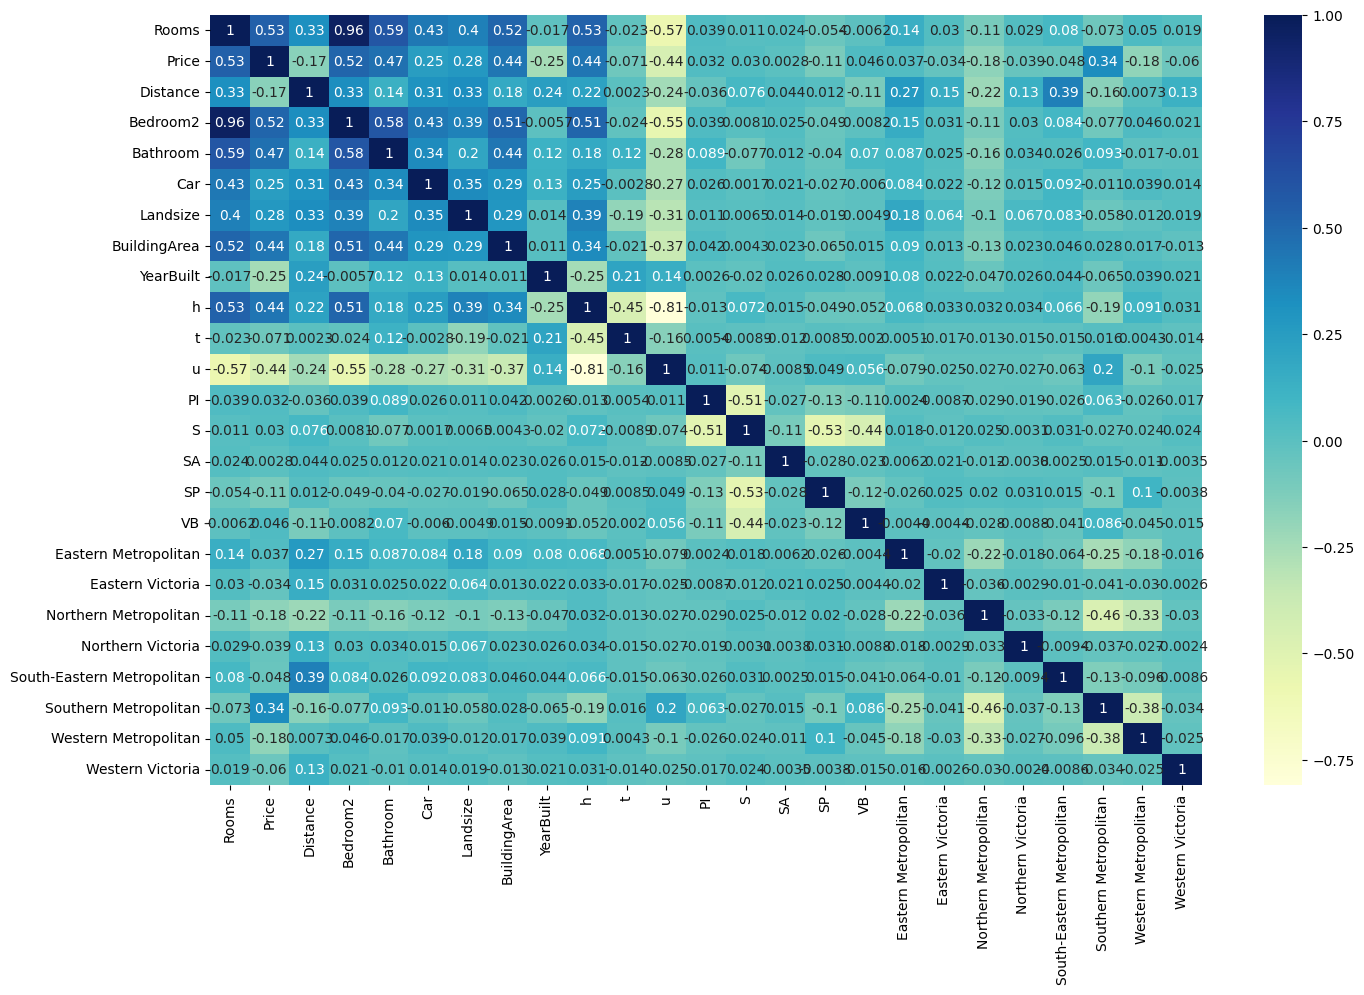

In [311]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize=(16,10))
sns.heatmap(df_train.corr(), annot=True, cmap="YlGnBu")
plt.show()

##### Dividing into X and Y sets for the model building

In [312]:
y_train = df_train.pop('Price')
X_train = df_train

##### Model Building

##### RFE
###### Recursive feature elimination

In [313]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [314]:
rfe = RFE(lm, n_features_to_select=6) 
rfe = rfe.fit(X_train, y_train)

In [315]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Rooms', True, 1),
 ('Distance', True, 1),
 ('Bedroom2', False, 8),
 ('Bathroom', True, 1),
 ('Car', False, 19),
 ('Landsize', False, 3),
 ('BuildingArea', False, 6),
 ('YearBuilt', False, 5),
 ('h', False, 7),
 ('t', False, 17),
 ('u', True, 1),
 ('PI', False, 14),
 ('S', False, 12),
 ('SA', False, 16),
 ('SP', False, 18),
 ('VB', False, 15),
 ('Eastern Metropolitan', False, 11),
 ('Eastern Victoria', False, 13),
 ('Northern Metropolitan', True, 1),
 ('Northern Victoria', False, 4),
 ('South-Eastern Metropolitan', False, 10),
 ('Southern Metropolitan', False, 9),
 ('Western Metropolitan', True, 1),
 ('Western Victoria', False, 2)]

In [316]:
col = X_train.columns[rfe.support_]
col

Index(['Rooms', 'Distance', 'Bathroom', 'u', 'Northern Metropolitan',
       'Western Metropolitan'],
      dtype='object')

In [317]:
X_train.columns[~rfe.support_]

Index(['Bedroom2', 'Car', 'Landsize', 'BuildingArea', 'YearBuilt', 'h', 't',
       'PI', 'S', 'SA', 'SP', 'VB', 'Eastern Metropolitan', 'Eastern Victoria',
       'Northern Victoria', 'South-Eastern Metropolitan',
       'Southern Metropolitan', 'Western Victoria'],
      dtype='object')

In [318]:
X_train_rfe = X_train[col]

In [319]:
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [320]:
lm = sm.OLS(y_train,X_train_rfe).fit()

In [322]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.630
Model:                            OLS   Adj. R-squared:                  0.630
Method:                 Least Squares   F-statistic:                     2696.
Date:                Thu, 03 Aug 2023   Prob (F-statistic):               0.00
Time:                        10:07:02   Log-Likelihood:                 4822.7
No. Observations:                9506   AIC:                            -9631.
Df Residuals:                    9499   BIC:                            -9581.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.48

In [323]:
# Calculate the VIFs for the model
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [324]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,18.70
1,Rooms,2.23
3,Bathroom,1.59
4,u,1.55
5,Northern Metropolitan,1.25
2,Distance,1.20
6,Western Metropolitan,1.17


##### Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [325]:
y_train_price = lm.predict(X_train_rfe)

In [326]:
res = (y_train_price - y_train)

In [327]:
# Importing the required libraries for plots.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 0, 'Errors')

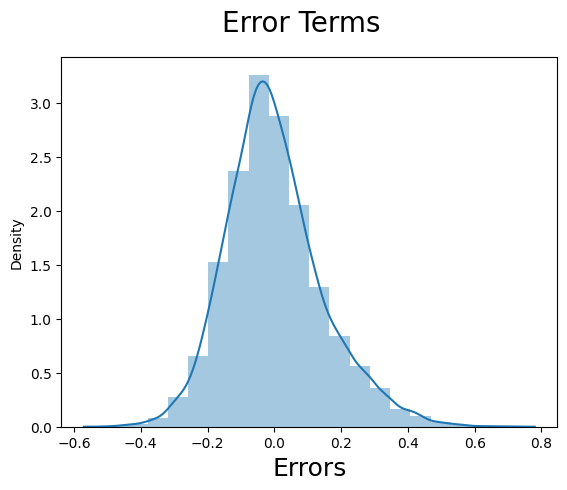

In [328]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

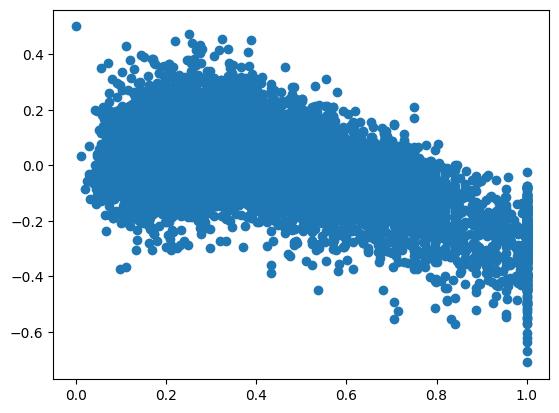

In [329]:
plt.scatter(y_train,res)
plt.show()

There may be some relation in the error terms.

##### Model Evaluation

Applying the scaling on the test sets

##### Dividing into X_test and y_test

In [331]:
y_test = df_test.pop('Price')
X_test = df_test

In [332]:
# Adding constant variable to test dataframe
X_test = sm.add_constant(X_test)

Making predictions

In [333]:
# Creating X_test_new dataframe by dropping variables from X_test
X_test_rfe = X_test[X_train_rfe.columns]

In [337]:
# Making predictions
y_pred = lm.predict(X_test_rfe)

In [335]:
from sklearn.metrics import r2_score 
r2_score(y_test, y_pred)

-3.9268466878417376

Text(0, 0.5, 'y_pred')

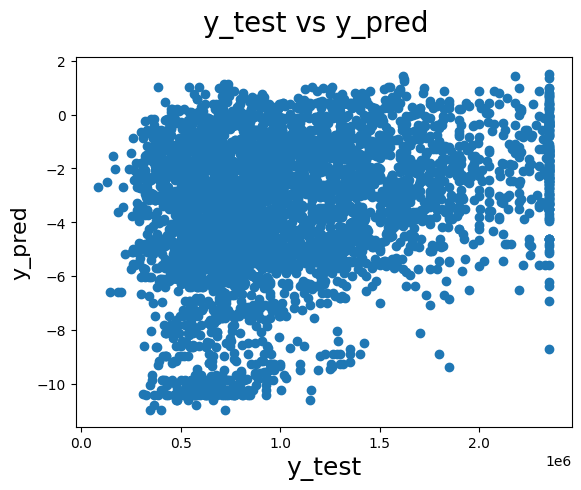

In [338]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label